<a href="https://colab.research.google.com/github/vrajpatel2312/Crime-Analysis/blob/master/crime_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


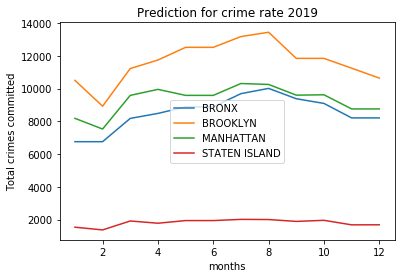

In [9]:
borough= ['BRONX','BROOKLYN','MANHATTAN','STATEN ISLAND']
import pandas as pd
import scipy.stats as stat
import matplotlib.pyplot as plt
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
import codecs
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from numpy.random import seed
from tensorflow import set_random_seed
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
random_forest = RandomForestClassifier()


def run(PATH,i):
  data = pd.read_csv(PATH)
  data= data.drop(columns='Unnamed: 0')
  x_test =data[data['rate'].isnull()]
  x_test= x_test.drop(columns=['rate'])
  x= data.dropna()
  x_train = x.drop(columns=['rate'])
  y_train = x['rate']
  def predict(model,name,i):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)    
    x_test['rate']=y_pred
    output = x.append(x_test)
    month=output.loc[output['variable'] == 2019]
    month = month.sort_values('Month')
    queens_count=month['rate']
    queens_month=month['Month']
    # Plotting crimes against years
    plt.xlabel('months')
    plt.ylabel('Total crimes committed')
    plt.plot(queens_month,queens_count,label=i)
    plt.xticks()
    plt.legend()
    plt.title("Prediction for crime rate 2019")
  predict(random_forest,'random forest',i) 


for i in borough:
  PATH='/datasets/'+i+'_cleaned.csv'
  run(PATH,i)